In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/helmet-detection-yolov3/yolov3-helmet.weights
/kaggle/input/helmet-detection-yolov3/helmet.names
/kaggle/input/helmet-detection-yolov3/helmet_detection.jpg
/kaggle/input/helmet-detection-yolov3/yolov3-helmet.cfg
/kaggle/input/detect-person-on-motorbike-or-scooter/chart.png
/kaggle/input/detect-person-on-motorbike-or-scooter/yolov3-obj_final.weights
/kaggle/input/detect-person-on-motorbike-or-scooter/yolov3_pb.cfg
/kaggle/input/detect-person-on-motorbike-or-scooter/predictions.jpg
/kaggle/input/detect-person-on-motorbike-or-scooter/coco.names
/kaggle/input/detect-person-on-motorbike-or-scooter/dataset/obj/333__flip.txt
/kaggle/input/detect-person-on-motorbike-or-scooter/dataset/obj/98__flip.jpg
/kaggle/input/detect-person-on-motorbike-or-scooter/dataset/obj/56__flip.jpg
/kaggle/input/detect-person-on-motorbike-or-scooter/dataset/obj/140__flip.jpg
/kaggle/input/detect-person-on-motorbike-or-scooter/dataset/obj/IMG_5907.txt
/kaggle/input/detect-person-on-motorbike-or-scooter

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import pylab as pl
from PIL import Image

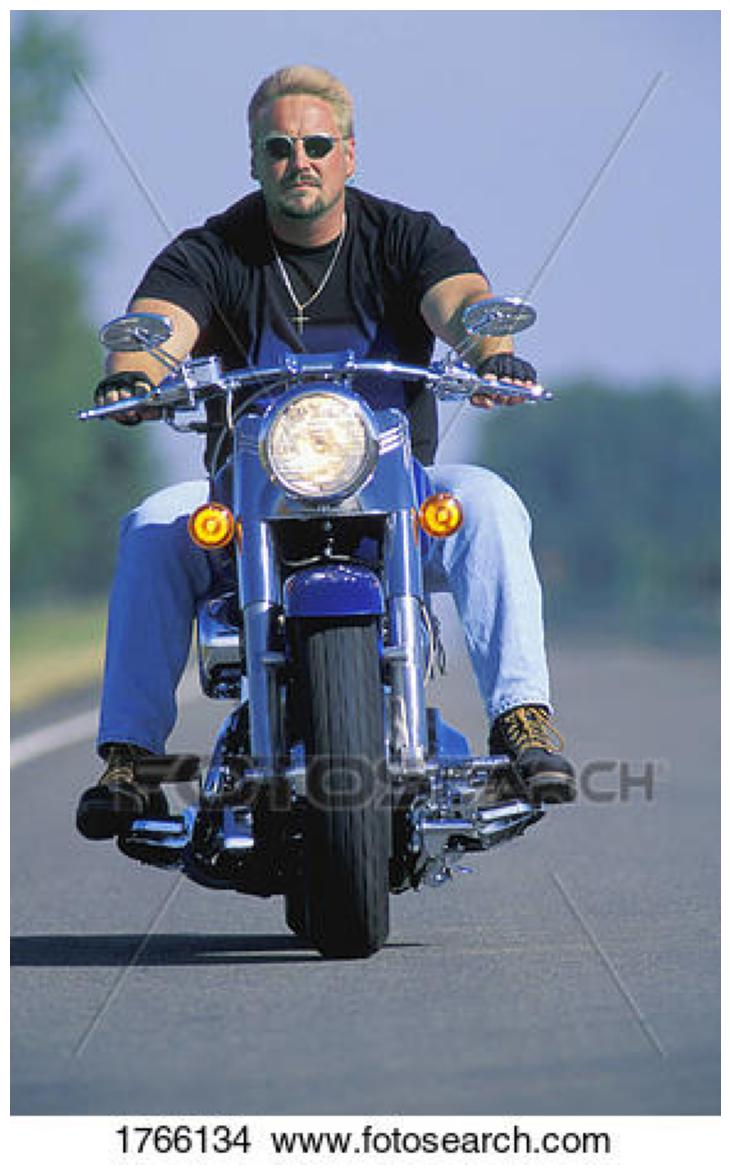

In [3]:
img0 = "../input/detect-person-on-motorbike-or-scooter/dataset/obj/100.jpg"
_ = plt.figure(figsize = (15,15))
_ = plt.axis('off')
_ = plt.imshow(mpimg.imread(img0))

In [4]:
directory = '../input/detect-person-on-motorbike-or-scooter/dataset/obj/'

imagepath=[]
imagefile=[]
boxset=[]
boxfile=[]

for im in os.listdir(directory):
    if im[-4:]=='.jpg':
        path=os.path.join(directory,im)
        imagepath+=[path]
        imagefile+=[im]
        
for im in imagefile:
    if im[-4:]=='.jpg':
        bx=im[0:-4]+'.txt'
        path=os.path.join(directory,bx)
        if os.path.isfile(path):
            bxdata=np.loadtxt(path)
        boxset+=[bxdata]
        boxfile+=[bx]   

In [5]:
print(imagefile[0:5])
print(boxfile[0:5])

['98__flip.jpg', '56__flip.jpg', '140__flip.jpg', '208.jpg', 'IMG_5892.jpg']
['98__flip.txt', '56__flip.txt', '140__flip.txt', '208.txt', 'IMG_5892.txt']


In [6]:
# for person on bike
weights0_path = '../input/detect-person-on-motorbike-or-scooter/yolov3-obj_final.weights'
configuration0_path = '../input/detect-person-on-motorbike-or-scooter/yolov3_pb.cfg'

probability_minimum = 0.5
threshold = 0.3

In [7]:
num0=0
for i in range(692):
    if imagepath[i]==img0:
        num0=i
        print(i)

476


In [8]:
network0 = cv2.dnn.readNetFromDarknet(configuration0_path, weights0_path)
layers_names0_all = network0.getLayerNames()
layers_names0_output = [layers_names0_all[i - 1] for i in network0.getUnconnectedOutLayers()]
labels0 = open('../input/detect-person-on-motorbike-or-scooter/coco.names').read().strip().split('\n')
print(labels0)

['person_bike']


In [9]:
# for helmet
weights1_path = '../input/helmet-detection-yolov3/yolov3-helmet.weights'
configuration1_path = '../input/helmet-detection-yolov3/yolov3-helmet.cfg'

In [10]:
network1 = cv2.dnn.readNetFromDarknet(configuration1_path, weights1_path)
layers_names1_all = network1.getLayerNames()
layers_names1_output = [layers_names1_all[i-1] for i in network1.getUnconnectedOutLayers()]
labels1 = open('../input/helmet-detection-yolov3/helmet.names').read().strip().split('\n')
print(labels1)

['Helmet']


In [11]:
image_input = cv2.imread(imagepath[num0])
blob = cv2.dnn.blobFromImage(image_input,1/255.0,(416,416),swapRB=True,crop=False)
blob_to_show = blob[0,:,:,:].transpose(1,2,0)
network0.setInput(blob)
network1.setInput(blob)
output_from_network0 = network0.forward(layers_names0_output)
output_from_network1 = network1.forward(layers_names1_output)
np.random.seed(42)
colours0 = np.random.randint(0,255,size=(len(labels0),3),dtype='uint8')
colours1 = np.random.randint(0,255,size=(len(labels1),3),dtype='uint8')

print(colours0)
print(colours1)

[[102 220 225]]
[[179  61 234]]


In [12]:
bounding_boxes0 = []
confidences0 = []
class_numbers0 = []

bounding_boxes1 = []
confidences1 = []
class_numbers1 = []

h,w = image_input.shape[:2]

for result in output_from_network0:
    for detection in result:
        scores = detection[5:]
        class_current=np.argmax(scores)
        confidence_current=scores[class_current]
        if confidence_current>probability_minimum:
            box_current=detection[0:4]*np.array([w,h,w,h])
            x_center,y_center,box_width,box_height=box_current.astype('int')
            x_min=int(x_center-(box_width/2))
            y_min=int(y_center-(box_height/2))
            
            bounding_boxes0.append([x_min,y_min,int(box_width),int(box_height)])
            confidences0.append(float(confidence_current))
            class_numbers0.append(class_current)
            
for result in output_from_network1:
    for detection in result:
        scores = detection[5:]
        class_current=np.argmax(scores)
        confidence_current=scores[class_current]
        if confidence_current>probability_minimum:
            box_current=detection[0:4]*np.array([w,h,w,h])
            x_center,y_center,box_width,box_height=box_current.astype('int')
            x_min=int(x_center-(box_width/2))
            y_min=int(y_center-(box_height/2))
            
            bounding_boxes1.append([x_min,y_min,int(box_width),int(box_height)])
            confidences1.append(float(confidence_current))
            class_numbers1.append(class_current)            

In [13]:
results0 = cv2.dnn.NMSBoxes(bounding_boxes0,confidences0,probability_minimum,threshold)

if len(results0) > 0:
    for i in results0.flatten():
        x_min,y_min=bounding_boxes0[i][0],bounding_boxes0[i][1]
        box_width,box_height= bounding_boxes0[i][2],bounding_boxes0[i][3]
        colour_box_current=[int(j) for j in colours0[class_numbers0[i]]]   
        cv2.rectangle(image_input,(x_min,y_min),(x_min+box_width,y_min+box_height),colour_box_current,5)
        text_box_current0='{}: {:.4f}'.format(labels0[int(class_numbers0[i])],confidences0[i])
        cv2.putText(image_input,text_box_current0,(x_min,y_min-7),cv2.FONT_HERSHEY_SIMPLEX,1.5,colour_box_current,5)

In [14]:
results1 = cv2.dnn.NMSBoxes(bounding_boxes1,confidences1,probability_minimum,threshold)

if len(results1) > 0:
    for i in results1.flatten():
        x_min,y_min=bounding_boxes1[i][0],bounding_boxes1[i][1]
        box_width,box_height= bounding_boxes1[i][2],bounding_boxes1[i][3]
        colour_box_current=[int(j) for j in colours1[class_numbers1[i]]]   
        cv2.rectangle(image_input,(x_min,y_min),(x_min+box_width,y_min+box_height),colour_box_current,5)
        text_box_current1='{}: {:.4f}'.format(labels1[int(class_numbers1[i])],confidences1[i])
        cv2.putText(image_input,text_box_current1,(x_min,y_min-7),cv2.FONT_HERSHEY_SIMPLEX,1.5,colour_box_current,5)

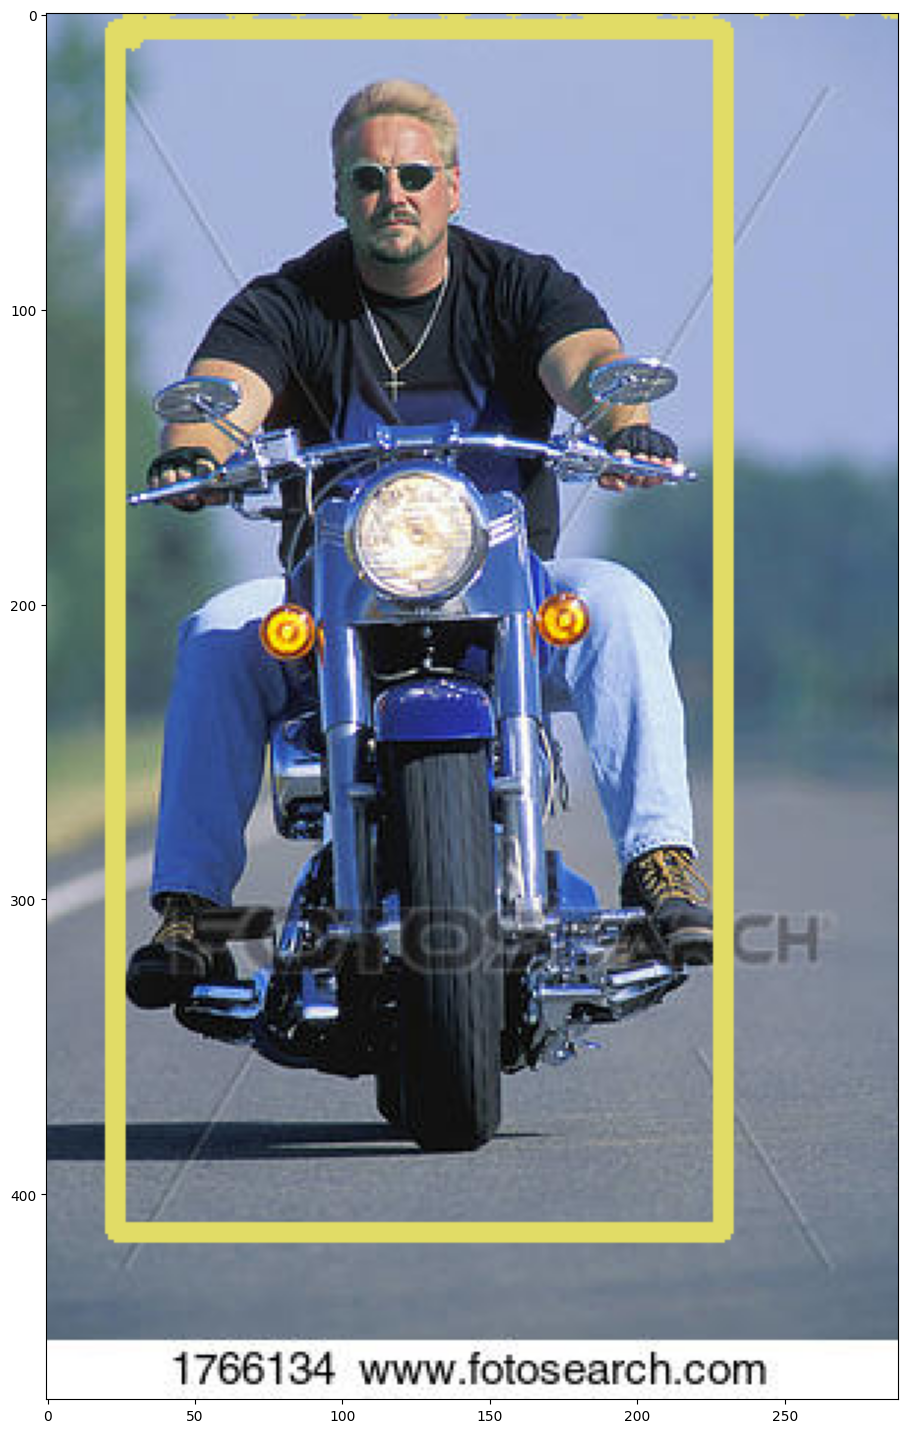

In [15]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (18.0,18.0)
plt.imshow(cv2.cvtColor(image_input,cv2.COLOR_BGR2RGB))
plt.show()